In [7]:
#%pip uninstall opencv-python
%pip install opencv-contrib-python
%pip install imutils
%pip install qrcode
%pip install cvlib
%pip install opencv-python tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-2.3.1-cp37-cp37m-win_amd64.whl (342.5 MB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=f5415d517ec1da427b0973371ebe58928de15bd0ff79ebc5966b763c0fcc32ed
  Stored in directory: c:\users\alphonse\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import cv2
import glob
from imutils.video import VideoStream
from imutils.video import FPS
from imutils import paths
import argparse
import imutils
import time
from matplotlib import pyplot as plt
import qrcode
import cvlib as cv
from cvlib.object_detection import draw_bbox
from cvlib.object_detection import YOLO
import math
from mpl_toolkits.mplot3d import axes3d

## Camera Calibration and 3D Reconstruction

In [3]:
#Capture video from webcam
vid_capture = cv2.VideoCapture(0)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*4,3), np.float32)
objp[:,:2] = np.mgrid[0:4,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

#ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
#while(True):
for i in range(100):
    # Capture each frame of webcam video
    ret,frame = vid_capture.read()
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret2, corners = cv2.findChessboardCorners(gray, (4,6),None)

    # If found, add object points, image points (after refining them)
    if ret2 == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(frame, (4,6), corners2,ret2)
        #cv2.imshow('img',img)
        if cv2.waitKey(1) &0XFF == ord('0'):
            break
    #cv2.imshow("My cam video", gray)
    # Close and break the loop after pressing "x" key
    if cv2.waitKey(1) &0XFF == ord('0'):
        break
            
# close the already opened camera
vid_capture.release()
# close the window and de-allocate any associated memory usage
cv2.destroyAllWindows()

In [5]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((3*3,3), np.float32)
objp[:,:2] = np.mgrid[0:3,0:3].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpointsA = [] # 3d point in real world space
imgpointsA = [] # 2d points in image plane.
for i in range(1,9):
    frame = cv2.imread("Callibration/callibration"+str(i)+"-a.png")
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
    # Find the chess board corners
    ret2, corners = cv2.findChessboardCorners(gray, (3,3),None)

    # If found, add object points, image points (after refining them)
    if ret2 == True:
        objpointsA.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpointsA.append(corners2)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(frame, (3,3), corners2,ret2)
        #cv2.imshow('img',img)
        if cv2.waitKey(1) &0XFF == ord('0'):
            break
    #cv2.imshow("My cam video", gray)
    # Close and break the loop after pressing "x" key
    if cv2.waitKey(1) &0XFF == ord('0'):
        break

In [6]:
retA, mtxA, distA, rvecsA, tvecsA = cv2.calibrateCamera(objpointsA, imgpointsA, gray.shape[::-1],None,None)

In [7]:
np.savez("matrix_dist_rvecs_tvecs_A", mtxA=mtxA, distA=distA, rvecsA=rvecsA, tvecsA=tvecsA)

In [22]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((3*3,3), np.float32)
objp[:,:2] = np.mgrid[0:3,0:3].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpointsZ = [] # 3d point in real world space
imgpointsZ = [] # 2d points in image plane.
for i in range(1,15):
    frame = cv2.imread("Callibration/callibration"+str(i)+"-z.png")
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
    # Find the chess board corners
    ret2, corners = cv2.findChessboardCorners(gray, (3,3),None)

    # If found, add object points, image points (after refining them)
    if ret2 == True:
        objpointsZ.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpointsZ.append(corners2)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(frame, (3,3), corners2,ret2)
        #cv2.imshow('img',img)
        if cv2.waitKey(1) &0XFF == ord('0'):
            break
    #cv2.imshow("My cam video", gray)
    # Close and break the loop after pressing "x" key
    if cv2.waitKey(1) &0XFF == ord('0'):
        break

In [23]:
retZ, mtxZ, distZ, rvecsZ, tvecsZ = cv2.calibrateCamera(objpointsZ, imgpointsZ, gray.shape[::-1],None,None)

In [24]:
np.savez("matrix_dist_rvecs_tvecs_Z", mtxZ=mtxZ, distZ=distZ, rvecsZ=rvecsZ, tvecsZ=tvecsZ)

In [25]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((3*3,3), np.float32)
objp[:,:2] = np.mgrid[0:3,0:3].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpointsE = [] # 3d point in real world space
imgpointsE = [] # 2d points in image plane.
for i in range(1,15):
    frame = cv2.imread("Callibration/callibration"+str(i)+"-e.png")
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
    # Find the chess board corners
    ret2, corners = cv2.findChessboardCorners(gray, (3,3),None)

    # If found, add object points, image points (after refining them)
    if ret2 == True:
        objpointsE.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpointsE.append(corners2)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(frame, (3,3), corners2,ret2)
        #cv2.imshow('img',img)
        if cv2.waitKey(1) &0XFF == ord('0'):
            break
    #cv2.imshow("My cam video", gray)
    # Close and break the loop after pressing "x" key
    if cv2.waitKey(1) &0XFF == ord('0'):
        break

In [26]:
retE, mtxE, distE, rvecsE, tvecsE = cv2.calibrateCamera(objpointsE, imgpointsE, gray.shape[::-1],None,None)

In [27]:
np.savez("matrix_dist_rvecs_tvecs_E", mtxE=mtxE, distE=distE, rvecsE=rvecsE, tvecsE=tvecsE)

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [142]:
np.savez("matrix_dist_rvecs_tvecs", mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)

NameError: name 'rvecs' is not defined

In [ ]:
#Capture video from webcam
vid_capture = cv2.VideoCapture(0)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*4,3), np.float32)
objp[:,:2] = np.mgrid[0:4,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

#ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
while(True):
#for i in range(1):
    # Capture each frame of webcam video
    ret,frame = vid_capture.read()
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    h,  w = frame.shape[:2]
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    
    #undistort
    mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
    dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

    # crop the image
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    
    
    # Find the chess board corners
    ret2, corners = cv2.findChessboardCorners(dst, (4,6),None)

    # If found, add object points, image points (after refining them)
    if ret2 == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(frame, (4,6), corners2,ret2)
        cv2.imshow('img',img)
        if cv2.waitKey(1) &0XFF == ord('0'):
            break
    #cv2.imshow("My cam video", gray)
    # Close and break the loop after pressing "x" key
    if cv2.waitKey(1) &0XFF == ord('0'):
        break
            
# close the already opened camera
vid_capture.release()
# close the window and de-allocate any associated memory usage
cv2.destroyAllWindows()

In [4]:
# close the already opened camera
vid_capture.release()

In [20]:
# Load previously saved data
with np.load('matrix_dist_rvecs_tvecs.npz') as X:
    mtx, dist, rvecs, tvecs = [X[i] for i in ('mtx','dist','rvecs','tvecs')]

In [21]:
print(rvecs)

[[[ 0.03830884]
  [ 0.48336566]
  [-0.00280973]]

 [[-0.10876259]
  [-0.19901135]
  [-0.00196814]]

 [[-0.2423686 ]
  [-0.27173345]
  [-0.00682873]]

 [[-0.10392827]
  [ 0.16164847]
  [ 0.01578368]]

 [[ 0.11957976]
  [ 0.22514945]
  [-0.01479849]]

 [[ 0.11957976]
  [ 0.22514945]
  [-0.01479849]]

 [[ 0.21899231]
  [ 0.21563191]
  [-0.01582329]]

 [[ 0.21899231]
  [ 0.21563191]
  [-0.01582329]]

 [[ 0.28803947]
  [ 0.33454847]
  [ 0.00109136]]

 [[ 0.28803947]
  [ 0.33454847]
  [ 0.00109136]]

 [[ 0.44723297]
  [ 0.33375521]
  [-0.00332172]]

 [[ 0.44723297]
  [ 0.33375521]
  [-0.00332172]]

 [[ 0.45609403]
  [ 0.35028214]
  [-0.00714609]]

 [[ 0.45609403]
  [ 0.35028214]
  [-0.00714609]]

 [[ 0.5565939 ]
  [ 0.39383565]
  [-0.01754423]]

 [[ 0.5565939 ]
  [ 0.39383565]
  [-0.01754423]]

 [[ 0.00250493]
  [ 0.27345584]
  [-0.082207  ]]

 [[ 0.01865378]
  [ 0.51112471]
  [-0.09092576]]

 [[ 0.69988231]
  [ 0.36372235]
  [-0.16528084]]

 [[ 0.69789941]
  [ 0.37538038]
  [-0.14963968]]



In [ ]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    h,  w = img.shape[:2]
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    
    # undistort
    mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
    dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

    # crop the image
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    
    cv2.imwrite(fname+'remapped.png',dst)
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(dst, (7,6),None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [141]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

NameError: name 'objpoints' is not defined

In [ ]:
img = cv2.imread('left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [ ]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

In [ ]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print("total error ", mean_error/len(objpoints))

In [3]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [7]:
def drawCube(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)

    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)

    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)

    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)

    return img

In [8]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*4,3), np.float32)
objp[:,:2] = np.mgrid[0:4,0:6].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
axisCube = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])

In [9]:
vid_capture = cv2.VideoCapture(0)
while True:
    
    ret,frame = vid_capture.read()
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret2, corners = cv2.findChessboardCorners(gray, (4,6),None)

    if ret2 == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

        # Find the rotation and translation vectors.
        _, rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)

        # project 3D points to image plane
        #imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
        imgpts, jac = cv2.projectPoints(axisCube, rvecs, tvecs, mtx, dist)

        #img = draw(frame,corners2,imgpts)
        img = drawCube(frame,corners2,imgpts)
        cv2.imshow('img',img)
        #k = cv2.waitKey(0) & 0xff
        if cv2.waitKey(1) &0XFF == ord('0'):
            break
        if cv2.waitKey(1) &0XFF == ord('s'):
            cv2.imwrite('projection.png', img)

cv2.destroyAllWindows()
vid_capture.release()

In [6]:
# close the already opened camera
vid_capture.release()

## Epipolar Geometry

In [2]:
img1 = cv2.imread('test_feuille_scene_unity_A_Cube_10.png',0)  #queryimage # left image
img2 = cv2.imread('test_feuille_scene_unity_E_Cube_10.png',0) #trainimage # right image

#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)


In [3]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [6]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    print(img1.shape)
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2


(1080, 1920)
(1080, 1920)


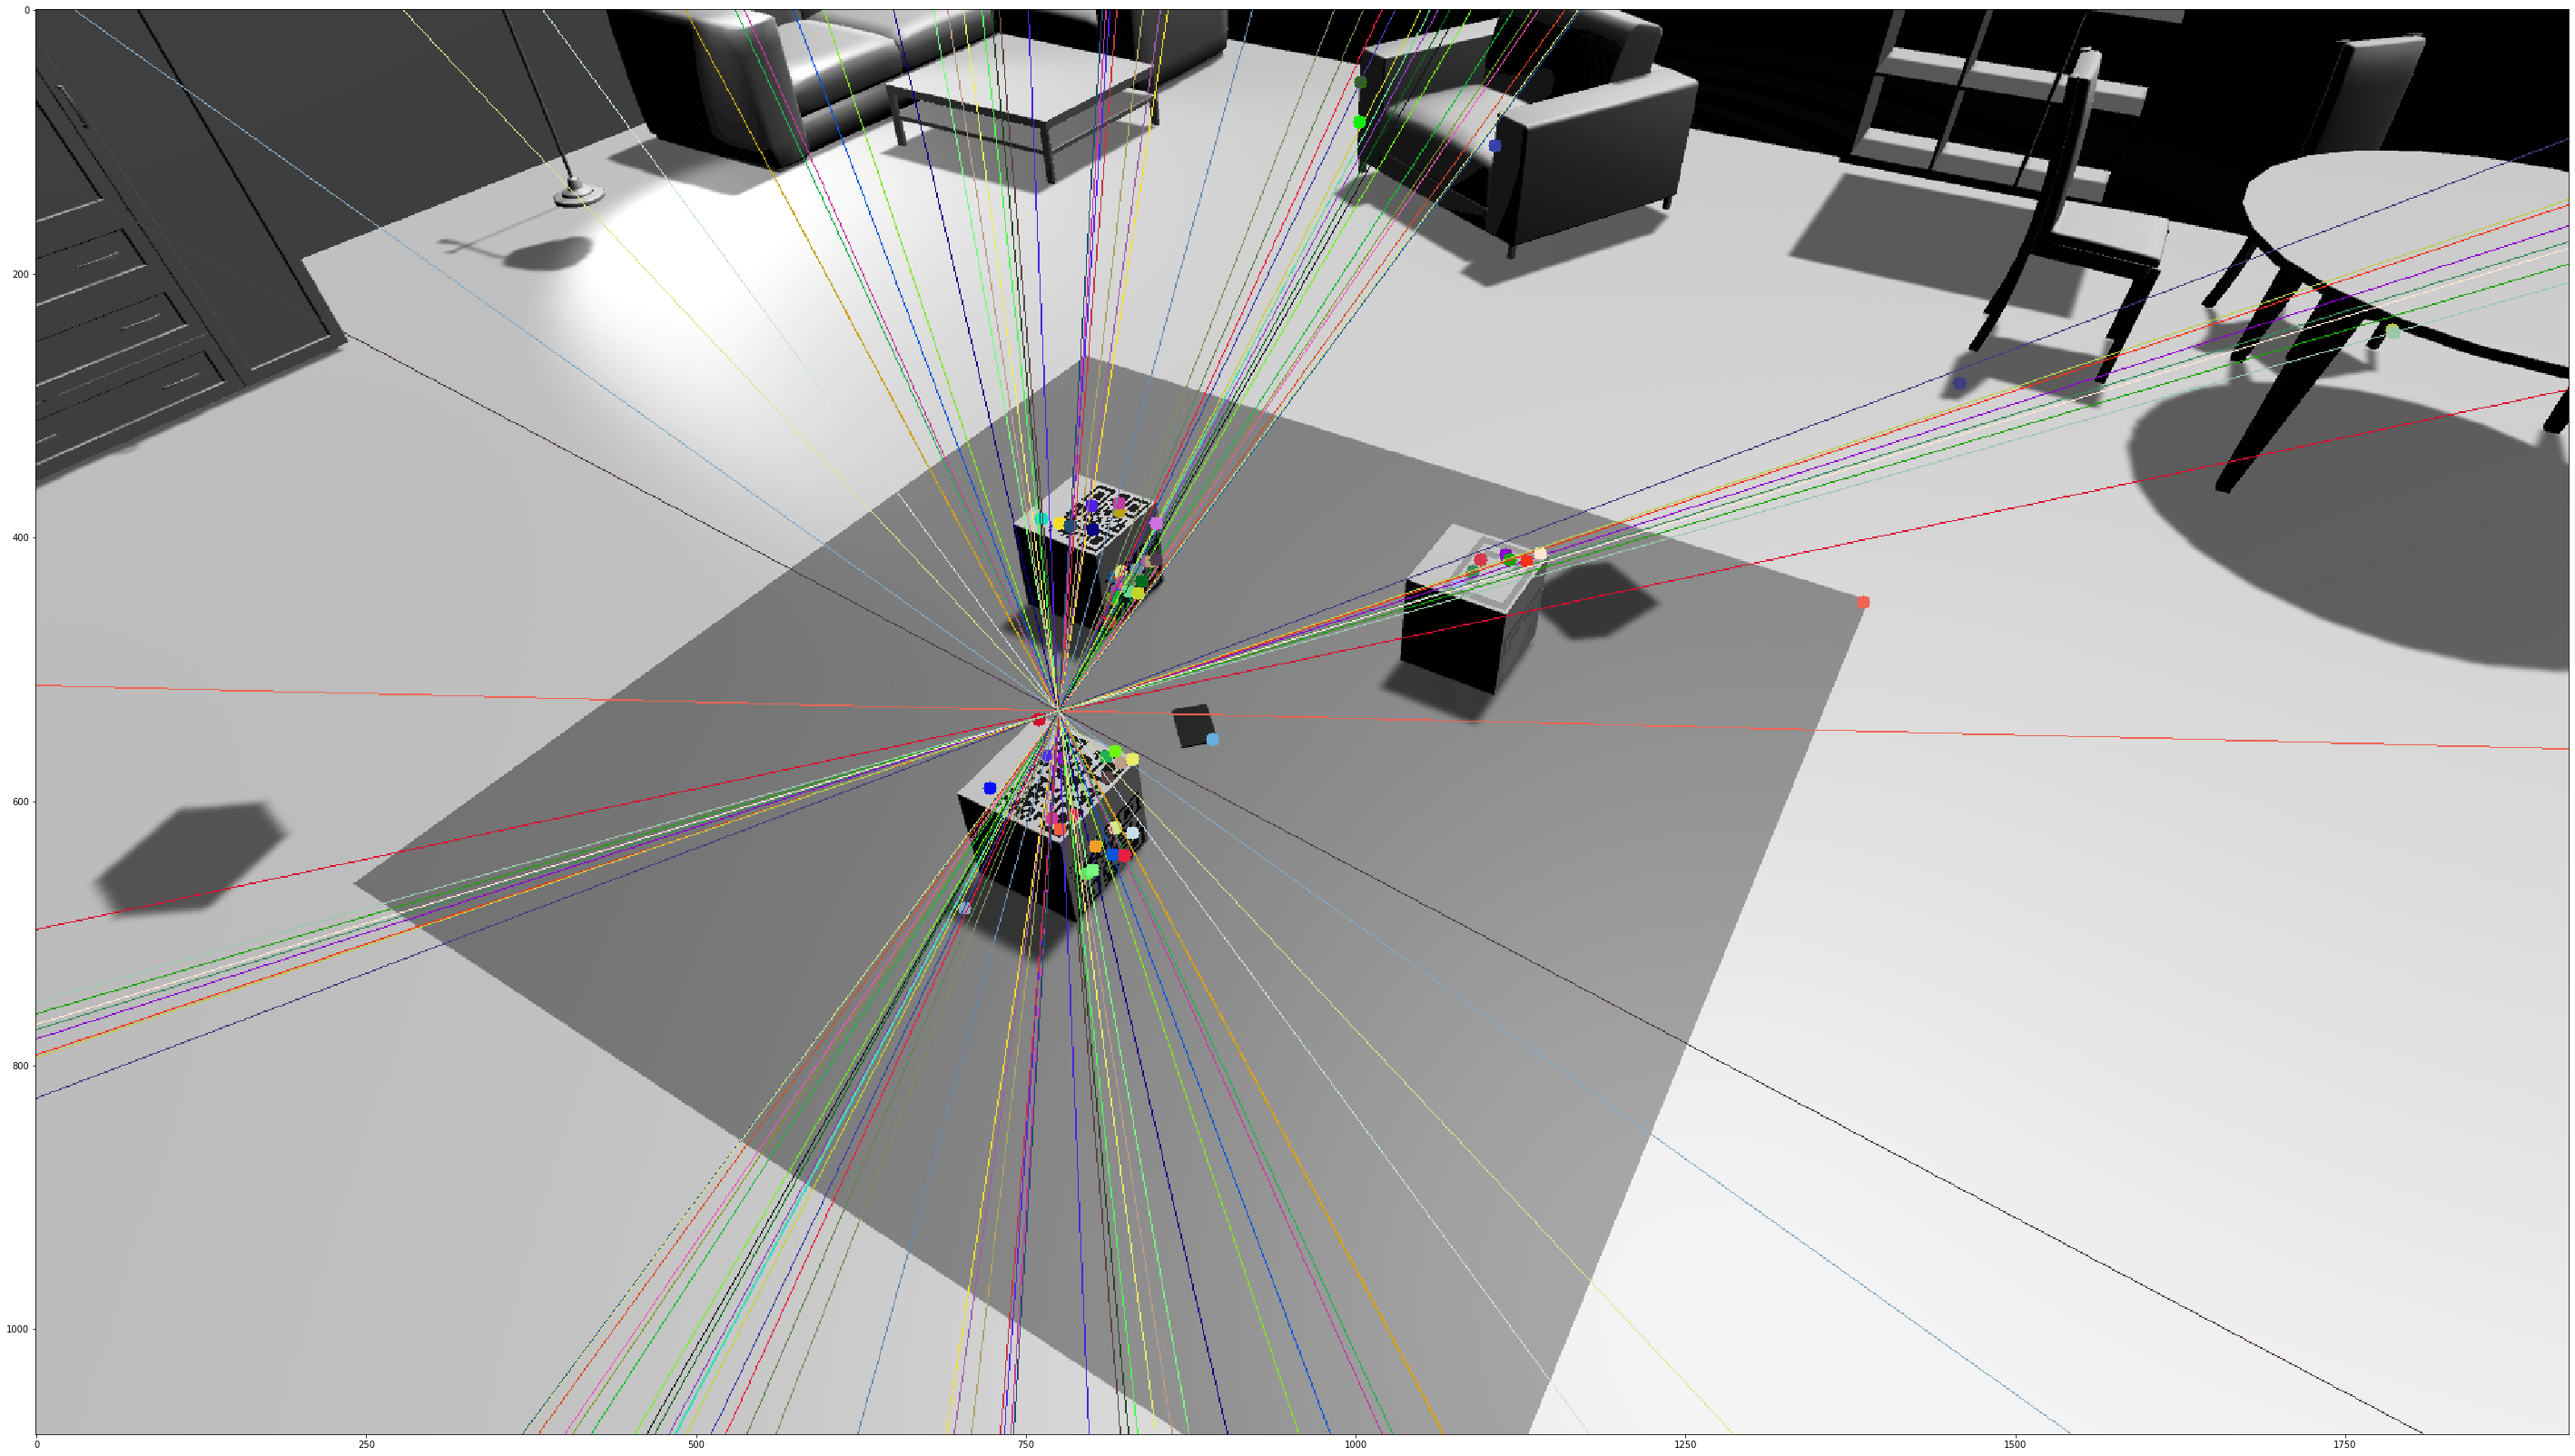

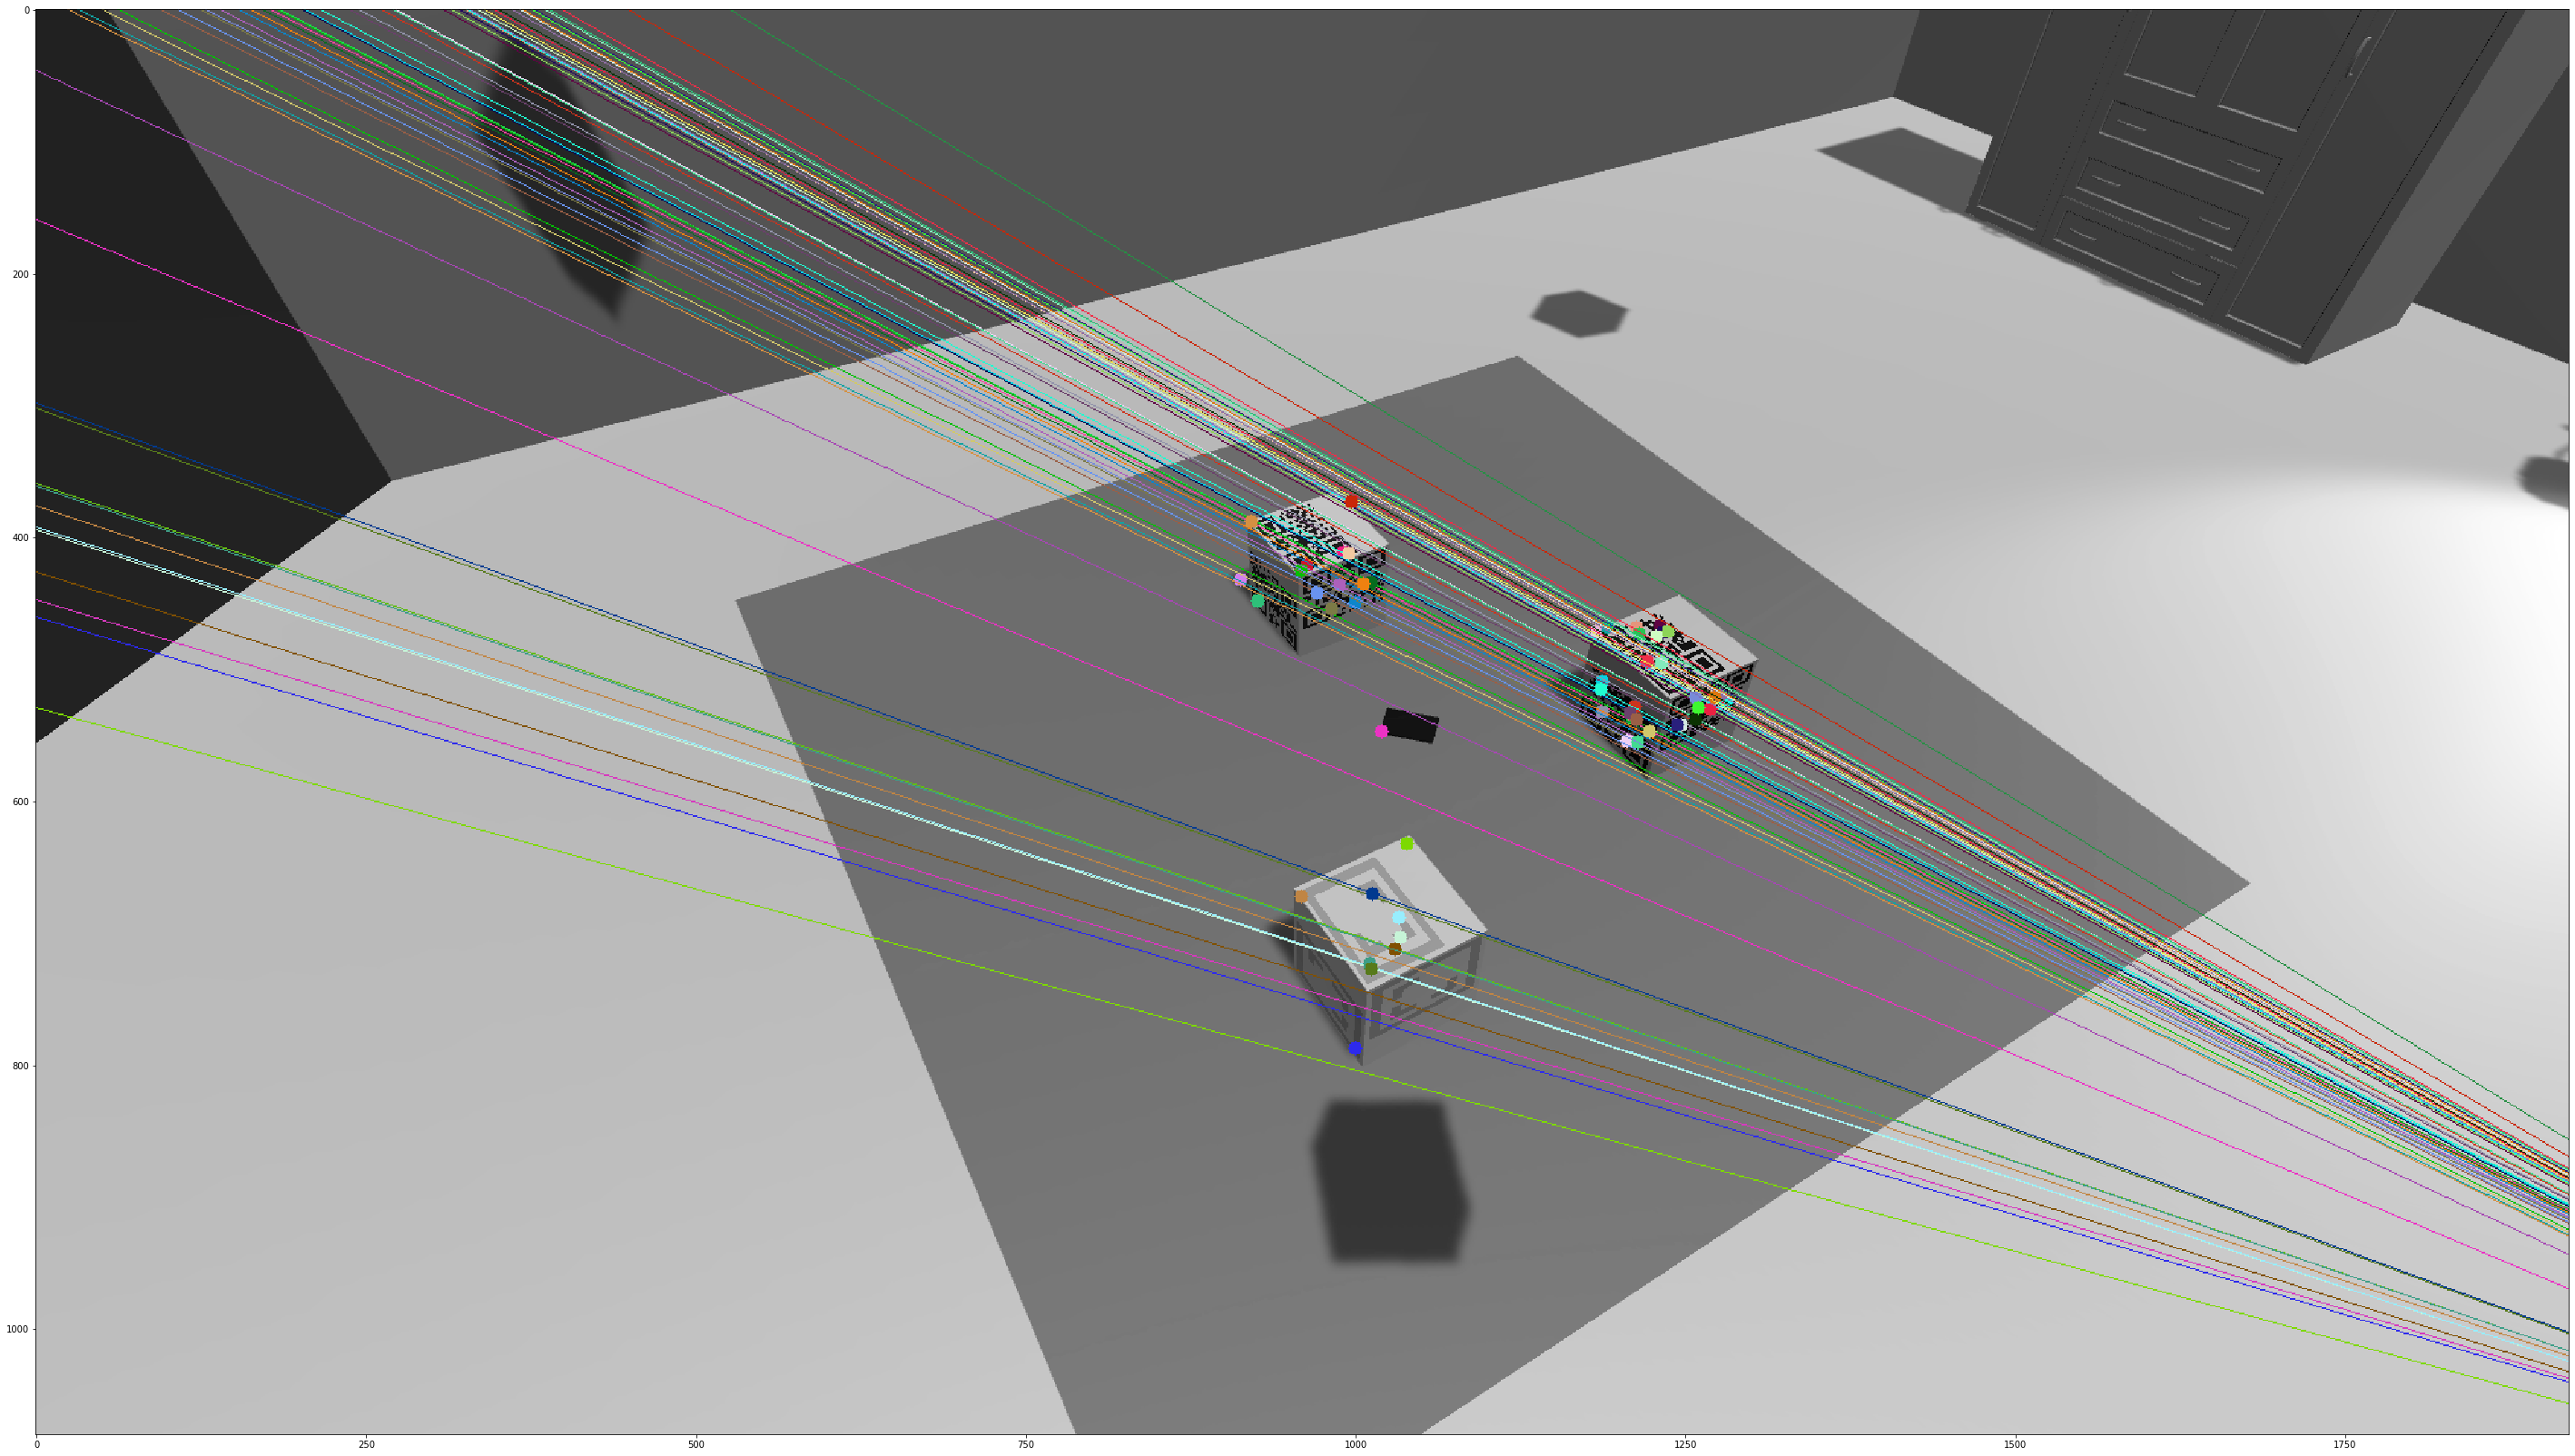

In [7]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.figure(figsize=(50,50))
#plt.subplot(121),
plt.imshow(img5)
plt.figure(figsize=(50,50))
#plt.subplot(122),
plt.imshow(img3)
plt.show()

In [11]:
img1 = cv2.imread('test_feuille_scene_unity_E_no_chara.png',0)  #queryimage # left image
img2 = cv2.imread('test_feuille_scene_unity_Z_no_chara.png',0) #trainimage # right image

#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)


In [12]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
E, mask = cv2.findEssentialMat(pts1,pts2,mtxE,cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [13]:
rotation1,rotation2,translation = cv2.decomposeEssentialMat(E)

In [22]:
normalize_pts1_0 = pts1[0] / np.linalg.norm(pts1[0])
normalize_pts2_0 = pts2[0] / np.linalg.norm(pts2[0])
y = list(normalize_pts1_0)
y.append(0)

In [23]:
x3 = np.dot(
        (rotation1[0] - normalize_pts1_0[0]*rotation1[2]),translation)/np.dot(
        (rotation1[0] - normalize_pts1_0[0]*rotation1[2]),y)

#C'est moche !!!
print(x3)
x1x2 = x3*(normalize_pts1_0)
print(x1x2)
point3D = list(x1x2)
point3D.append(x3[0])
print(point3D)

[-1.09286368]
[-0.87289975 -0.65756904]
[-0.8728997481215568, -0.6575690410252576, -1.09286367584688]


In [16]:
pts1_normalized = list(map(lambda pt: list(pt/np.linalg.norm(pt)),pts1))
pts2_normalized = list(map(lambda pt: list(pt/np.linalg.norm(pt)),pts2))
#print(pts1_normalized)
#print("\n")
print(pts1_normalized[0])
Y = []
for pt_n in pts1_normalized:
    y = list(pt_n)
    y.append(1)
    Y.append(y)

#print("\n")
X3 = list(map(lambda pt_n: np.dot(
        (rotation1[0] - pt_n*rotation1[2]),translation)/np.dot(
        (rotation1[0] - pt_n*rotation1[2]),y),pts1_normalized))
#print(X3)
#print("\n")

X1X2 = list(map(lambda pt_n,x3: list(x3*pt_n), pts1_normalized, X3))
#print(X1X2)
#print("\n")

points3D = []
for x1x2,x3 in zip(X1X2,X3):
    x1x2 = list(x1x2)
    x1x2.append(x3[0])
    points3D.append(x1x2)

#point3D = list(map(lambda x1x2,x3: x1x2.append(x3),X1X2,X3))
print(points3D)



[0.7987270209572396, 0.6016935648590346]


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [17]:
pts1_normalized = list(map(lambda pt: list(pt/np.linalg.norm(pt)),pts1))
pts2_normalized = list(map(lambda pt: list(pt/np.linalg.norm(pt)),pts2))
#print(pts1_normalized) #vect2
#print("\n")

Y = []
for pt_n in pts1_normalized:
    #Y = np.append(Y,np.append(list(pt_n),1))
    #Y = np.append(Y, y)
    y = list(pt_n)
    y.append(1)
    Y.append(y)
#print(Y)
#print("\n")
#print(Y)

X3 = list(map(lambda pt_n, y: np.dot((rotation1[0] - pt_n[0]*rotation1[2]),translation)
              /np.dot(y,(rotation1[0] - pt_n[0]*rotation1[2])),pts2_normalized,Y))
#print(X3)
#print("\n")

X1X2 = list(map(lambda pt_n,x3: list(x3*pt_n), pts2_normalized, X3))
#print(X1X2)
#print("\n")

points3D = []
for x1x2,x3 in zip(X1X2,X3):
    x1x2 = list(x1x2)
    x1x2.append(x3[0])
    points3D.append(x1x2)

#point3D = list(map(lambda x1x2,x3: x1x2.append(x3),X1X2,X3))
print(points3D)

[[1.315904865061136, 0.3836609171220462, 1.370693734288771], [1.0192906930559904, 0.20961219897522382, 1.0406203875140012], [1.1230566129069808, 0.2905494990496612, 1.1600323991993107], [1.1230566129069808, 0.2905494990496612, 1.1600323991993107], [1.5453023718059815, 0.4923087202213746, 1.6218283806602964], [1.4067076032135148, 0.39371408136588165, 1.4607659151296253], [1.408549400773624, 0.40185085845600443, 1.4647510118998255], [1.3531530283928985, 0.37872504584757505, 1.40515329363067], [0.8294670955024986, 1.0722379527227421, 1.3556215879737268], [1.5184450778988154, 0.424987543668473, 1.576797344895184], [0.8259354398714551, 1.067672641785052, 1.3498497030602798], [1.353475101287682, 0.43987940791849667, 1.423161530999355], [1.4336610544021822, 0.4659398426807092, 1.5074760216689687], [1.3057691534894584, 0.37731641123559023, 1.3591912140652918], [1.1814708261472973, 0.34139903742568, 1.2298075523399414], [0.9796223743664269, 0.30596048947298765, 1.0262903183202432], [0.919788946

In [40]:
imgPoints, jacobian = cv2.projectPoints(np.array(points).transpose(),rotation1,translation,mtx,0)
imgPoints = list(map(lambda points: points[0],imgPoints))
print(imgPoints)
x = list(map(lambda points: points[0],imgPoints))
y = list(map(lambda points: points[1],imgPoints))

[array([259.78395856,  96.52211151]), array([259.87561381,  96.53185927]), array([259.83259319,  96.52675577]), array([259.83259319,  96.52675577]), array([259.743247 ,  96.5184406]), array([259.77262598,  96.52171716]), array([259.77085939,  96.52141222]), array([259.78098026,  96.52229469]), array([259.62744006,  96.49238441]), array([259.75719463,  96.52067687]), array([259.62863201,  96.49246609]), array([259.76832136,  96.51991724]), array([259.75617988,  96.51908656]), array([259.78644267,  96.52237333]), array([259.81061351,  96.52411905]), array([259.85684881,  96.52692403]), array([259.89571506,  96.53197768])]


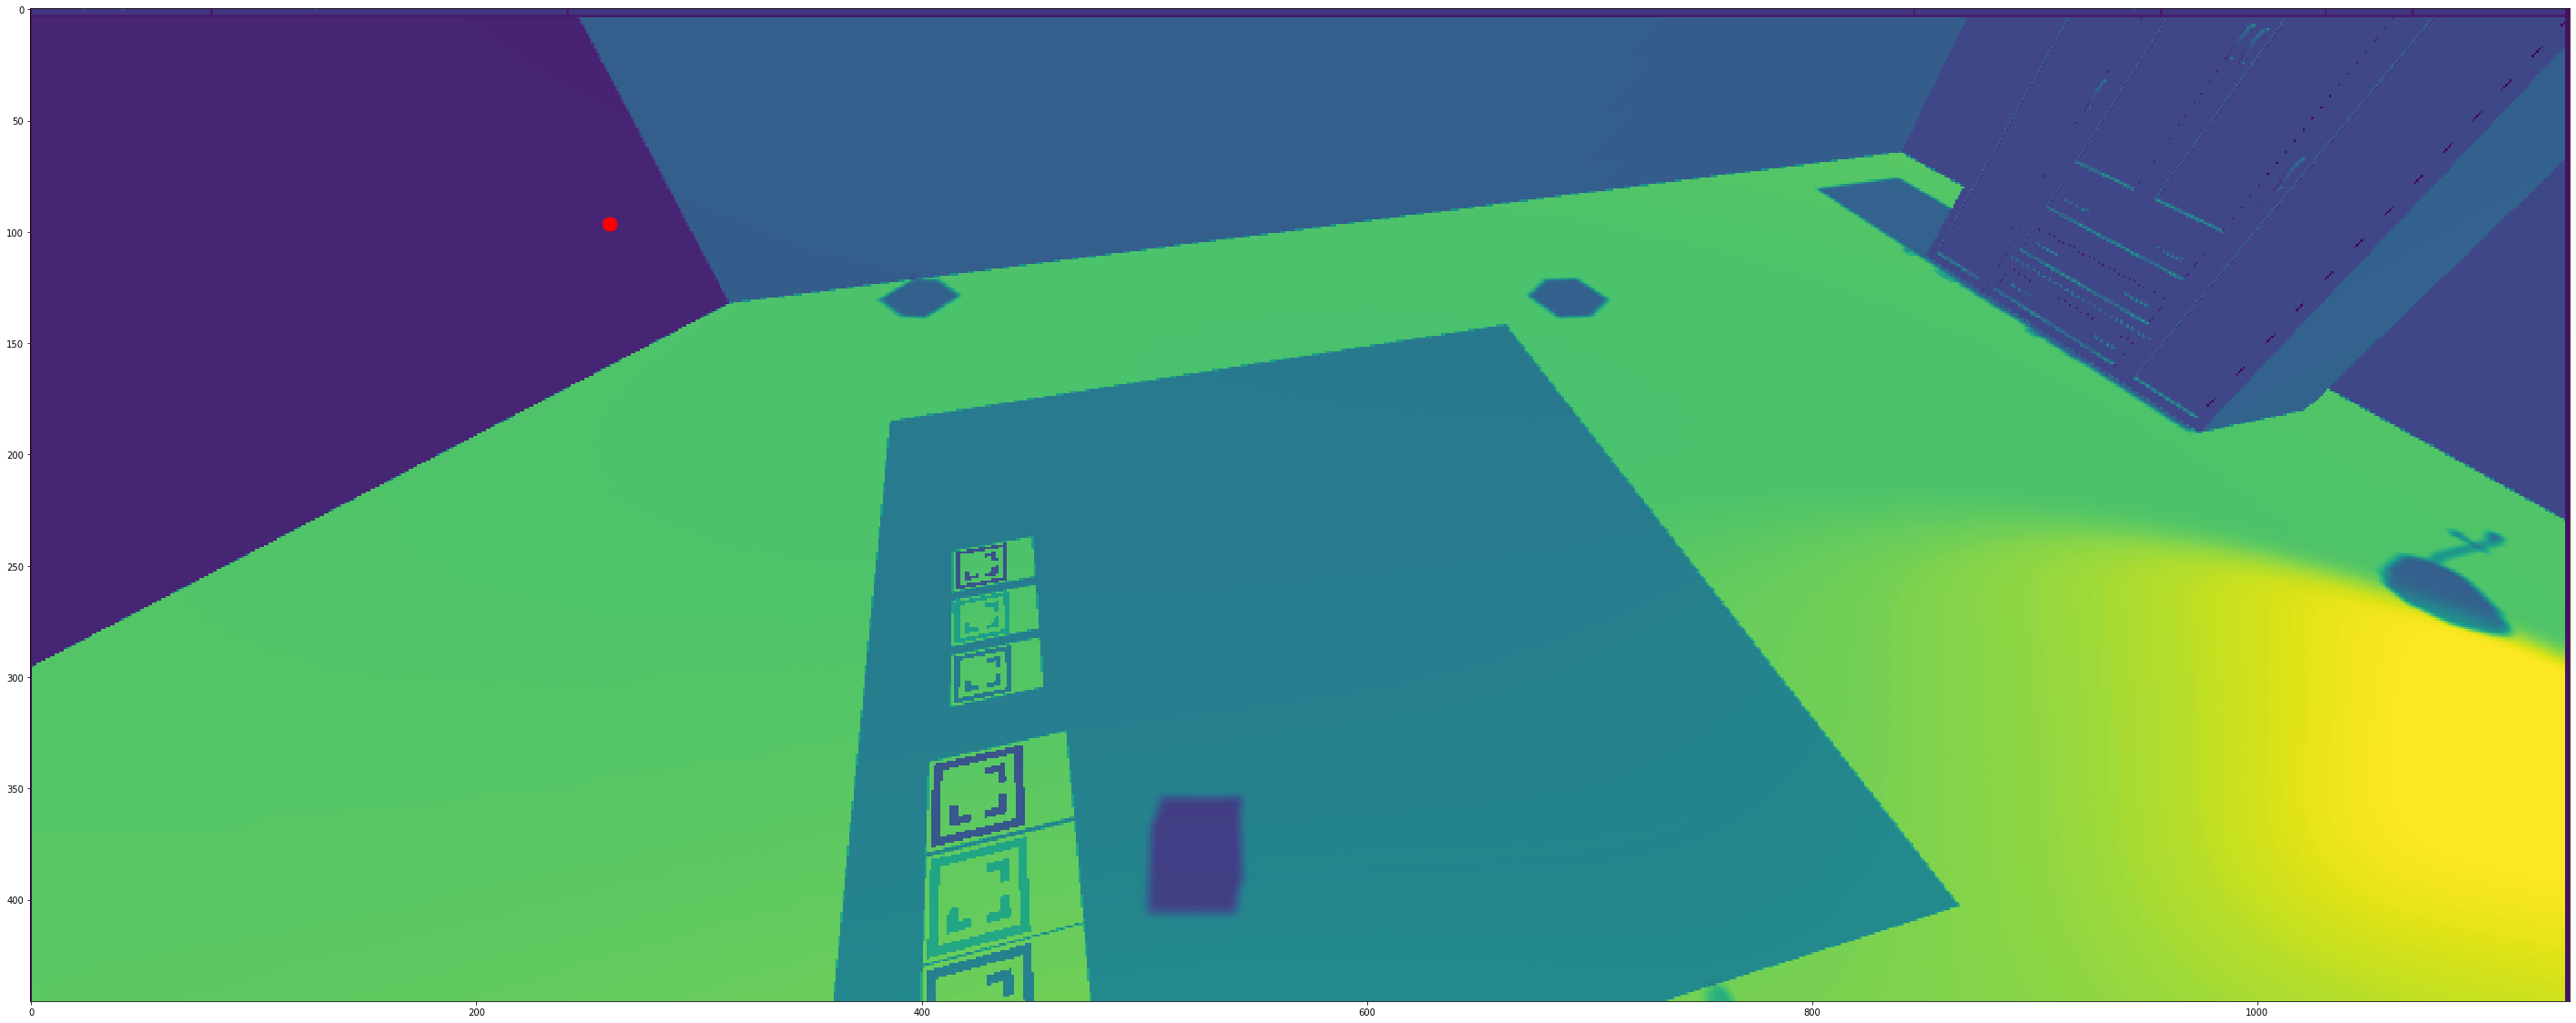

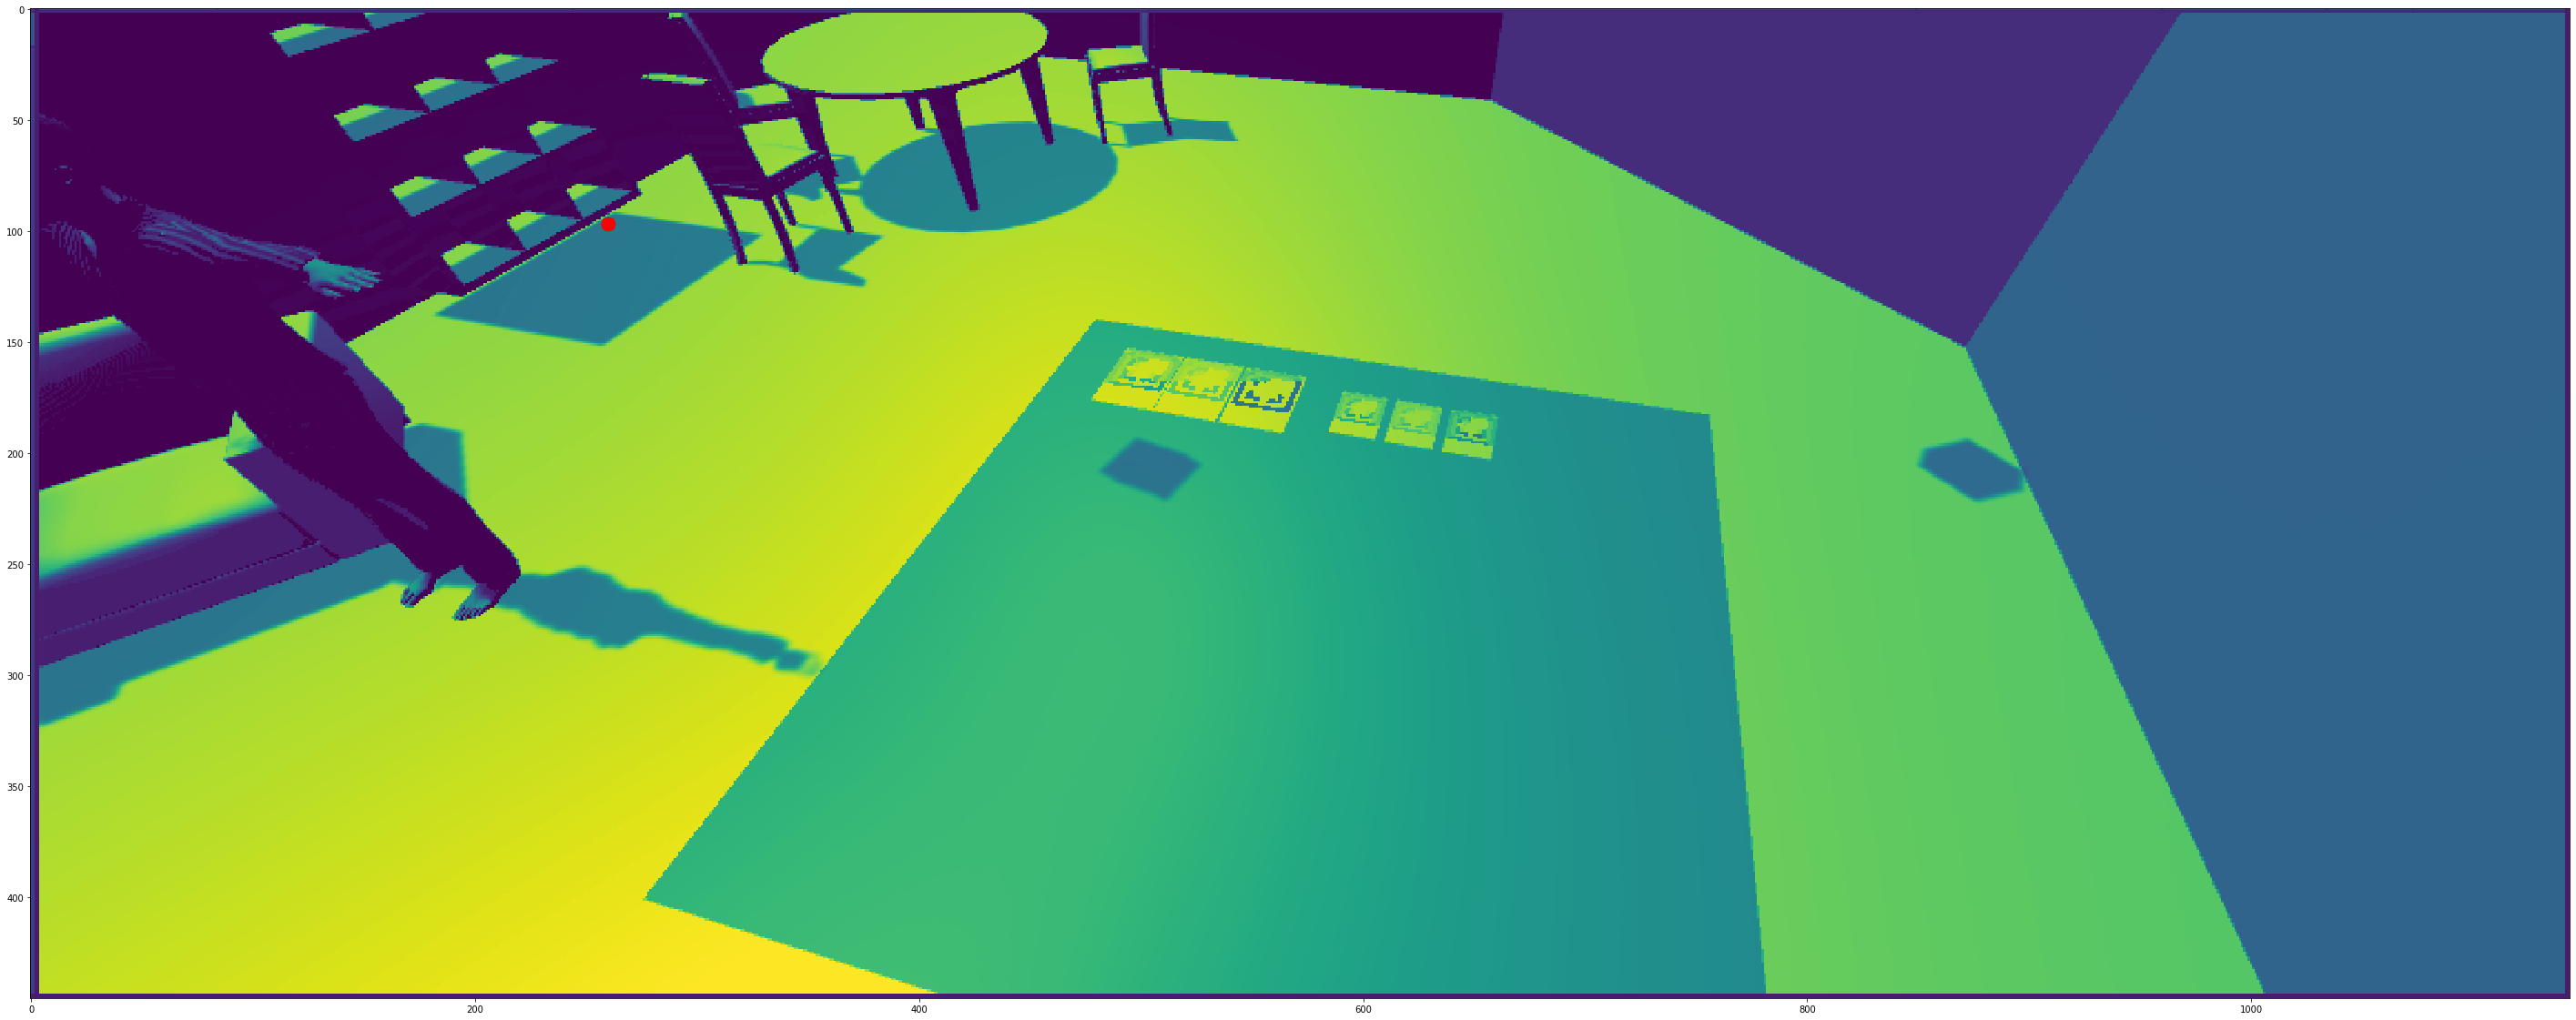

In [38]:
plt.figure(figsize=(50,50))
#plt.subplot(121),
plt.scatter(x,y,c='red',s=200)
plt.imshow(img1)
plt.figure(figsize=(50,50))
#plt.subplot(122),
plt.scatter(x,y,c='red',s=200)
plt.imshow(img2)
plt.show()

In [152]:
# Camera projection matrices
P1 = np.eye(4)
P2 = np.array([[ 0.878, -0.01 ,  0.479, -1.995],
            [ 0.01 ,  1.   ,  0.002, -0.226],
            [-0.479,  0.002,  0.878,  0.615],
            [ 0.   ,  0.   ,  0.   ,  1.   ]])
# Homogeneous arrays
a3xN = np.array([[ 0.091,  0.167,  0.231,  0.083,  0.154],
              [ 0.364,  0.333,  0.308,  0.333,  0.308],
              [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ]])
b3xN = np.array([[ 0.42 ,  0.537,  0.645,  0.431,  0.538],
              [ 0.389,  0.375,  0.362,  0.357,  0.345],
              [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ]])
# The cv2 method
X = cv2.triangulatePoints( P1[:3], P2[:3], a3xN[:2], b3xN[:2] )
# Remember to divide out the 4th row. Make it homogeneous
X /= X[3]
# Recover the origin arrays from PX
x1 = np.dot(P1[:3],X)
x2 = np.dot(P2[:3],X)
# Again, put in homogeneous form before using them
x1 /= x1[2]
x2 /= x2[2]
 
print('X\n', X)
print('x1\n', x1)
print('x2\n', x2)

X
 [[ 1.00277401  2.00861221  3.01259262  1.00350119  2.01054271]
 [ 4.01217993  4.01031008  4.01743742  4.02958919  4.01894571]
 [11.01977924 12.02856882 13.04163081 12.09159201 13.05497299]
 [ 1.          1.          1.          1.          1.        ]]
x1
 [[0.09099765 0.1669868  0.23099815 0.08299165 0.15400589]
 [0.36408896 0.33339877 0.30804717 0.33325547 0.30784788]
 [1.         1.         1.         1.         1.        ]]
x2
 [[0.42002058 0.53709198 0.64501084 0.43105651 0.5379664 ]
 [0.38890031 0.37453153 0.36194222 0.35671333 0.34517832]
 [1.         1.         1.         1.         1.        ]]


In [41]:
with np.load('matrix_dist_rvecs_tvecs_E.npz') as X:
    mtxE, distE, rvecsE, tvecsE = [X[i] for i in ('mtxE','distE','rvecsE','tvecsE')]
    
with np.load('matrix_dist_rvecs_tvecs_Z.npz') as X:
    mtxZ, distZ, rvecsZ, tvecsZ = [X[i] for i in ('mtxZ','distZ','rvecsZ','tvecsZ')]

print('\n')
    
projectionMatrix = np.dot(mtxE,np.concatenate((rvecsE[:3].transpose()[0],tvecsE[0]), axis=1))
print(projectionMatrix)
print('\n')
projectionMatrix2 = np.dot(mtxZ,np.concatenate((rvecsZ[:3].transpose()[0],tvecsZ[0]), axis=1))
print(projectionMatrix2)
print('\n')
pts1R = np.array(list(map(lambda pt: [pt[0],pt[1]], pts1_normalized)))
pts2R = np.array(list(map(lambda pt: [pt[0],pt[1]], pts2_normalized)))
points4D = cv2.triangulatePoints(projectionMatrix, projectionMatrix2, pts1R.T,pts2R.T)
print(points4D.T)
print('\n')
points = list(map(lambda pt: pt[:][:3],points4D.T))
print(points)



[[-9.99097782e+02  1.75431619e+03  6.42356739e+02  1.45751515e+02]
 [-3.87872855e+02  6.89268141e+02  2.37116523e+02  1.01570404e+02]
 [-1.75761773e+00  3.08533339e+00  1.12678197e+00  2.59163778e-01]]


[[-6.18223909e+02  1.55185597e+01 -3.54894252e+01  3.51725935e+02]
 [-4.17483855e+02  9.54644064e+01  6.62057254e+01  1.87365674e+02]
 [-1.12017513e+00  8.71307378e-02 -4.64446522e-03  6.43822820e-01]]


[[ 0.35015148 -0.0991103   0.65239717  0.66479247]
 [ 0.35019055 -0.09907129  0.6523189   0.6648545 ]
 [ 0.35017189 -0.09909006  0.65235536  0.66482576]
 [ 0.35017189 -0.09909006  0.65235536  0.66482576]
 [ 0.35013441 -0.09912697  0.65243228  0.66476451]
 [ 0.35014716 -0.09911444  0.65240727  0.66478421]
 [ 0.35014632 -0.09911528  0.65240872  0.66478311]
 [ 0.35015054 -0.09911116  0.65239997  0.66479008]
 [ 0.35007691 -0.09918838  0.65252399  0.66469562]
 [ 0.35014092 -0.09912046  0.65242076  0.66477336]
 [ 0.35007739 -0.09918792  0.65252295  0.66469646]
 [ 0.35014441 -0.09911736  0.

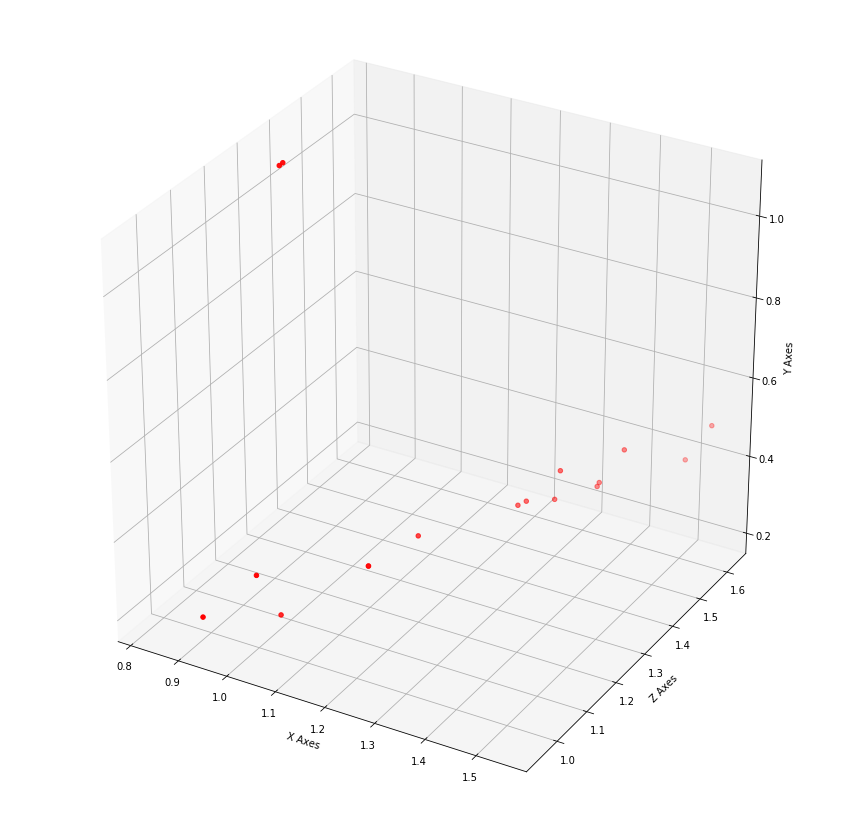

In [29]:
x = list(map(lambda pt: pt[0],points3D))
y = list(map(lambda pt: pt[1],points3D))
z = list(map(lambda pt: pt[2],points3D))

#3D Plotting
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection="3d")

ax.scatter(x,z,y,color='r')

#Labeling
ax.set_xlabel('X Axes')
ax.set_ylabel('Z Axes')
ax.set_zlabel('Y Axes')

plt.show()


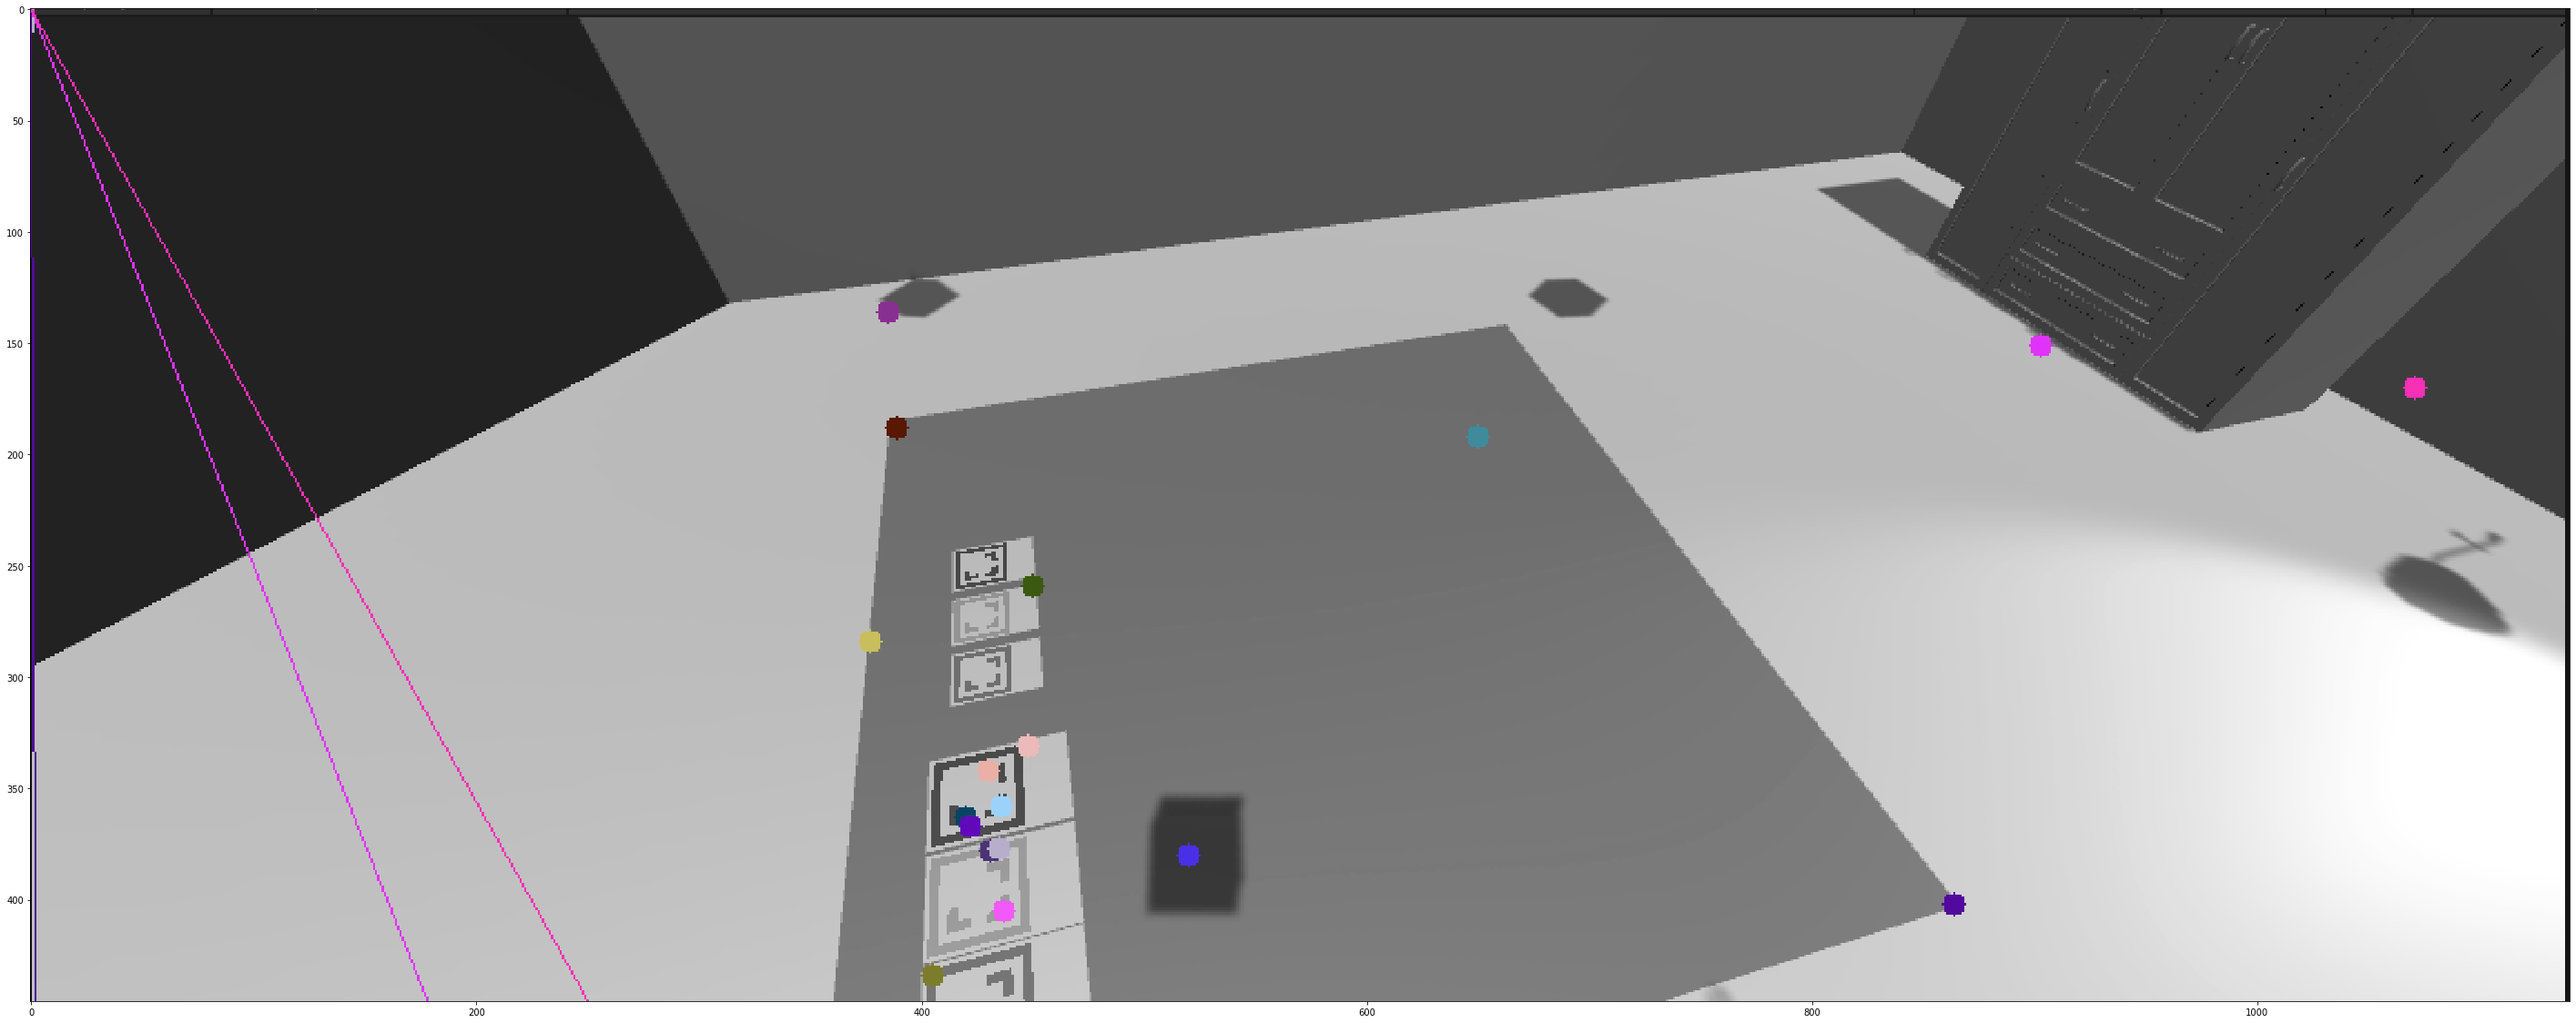

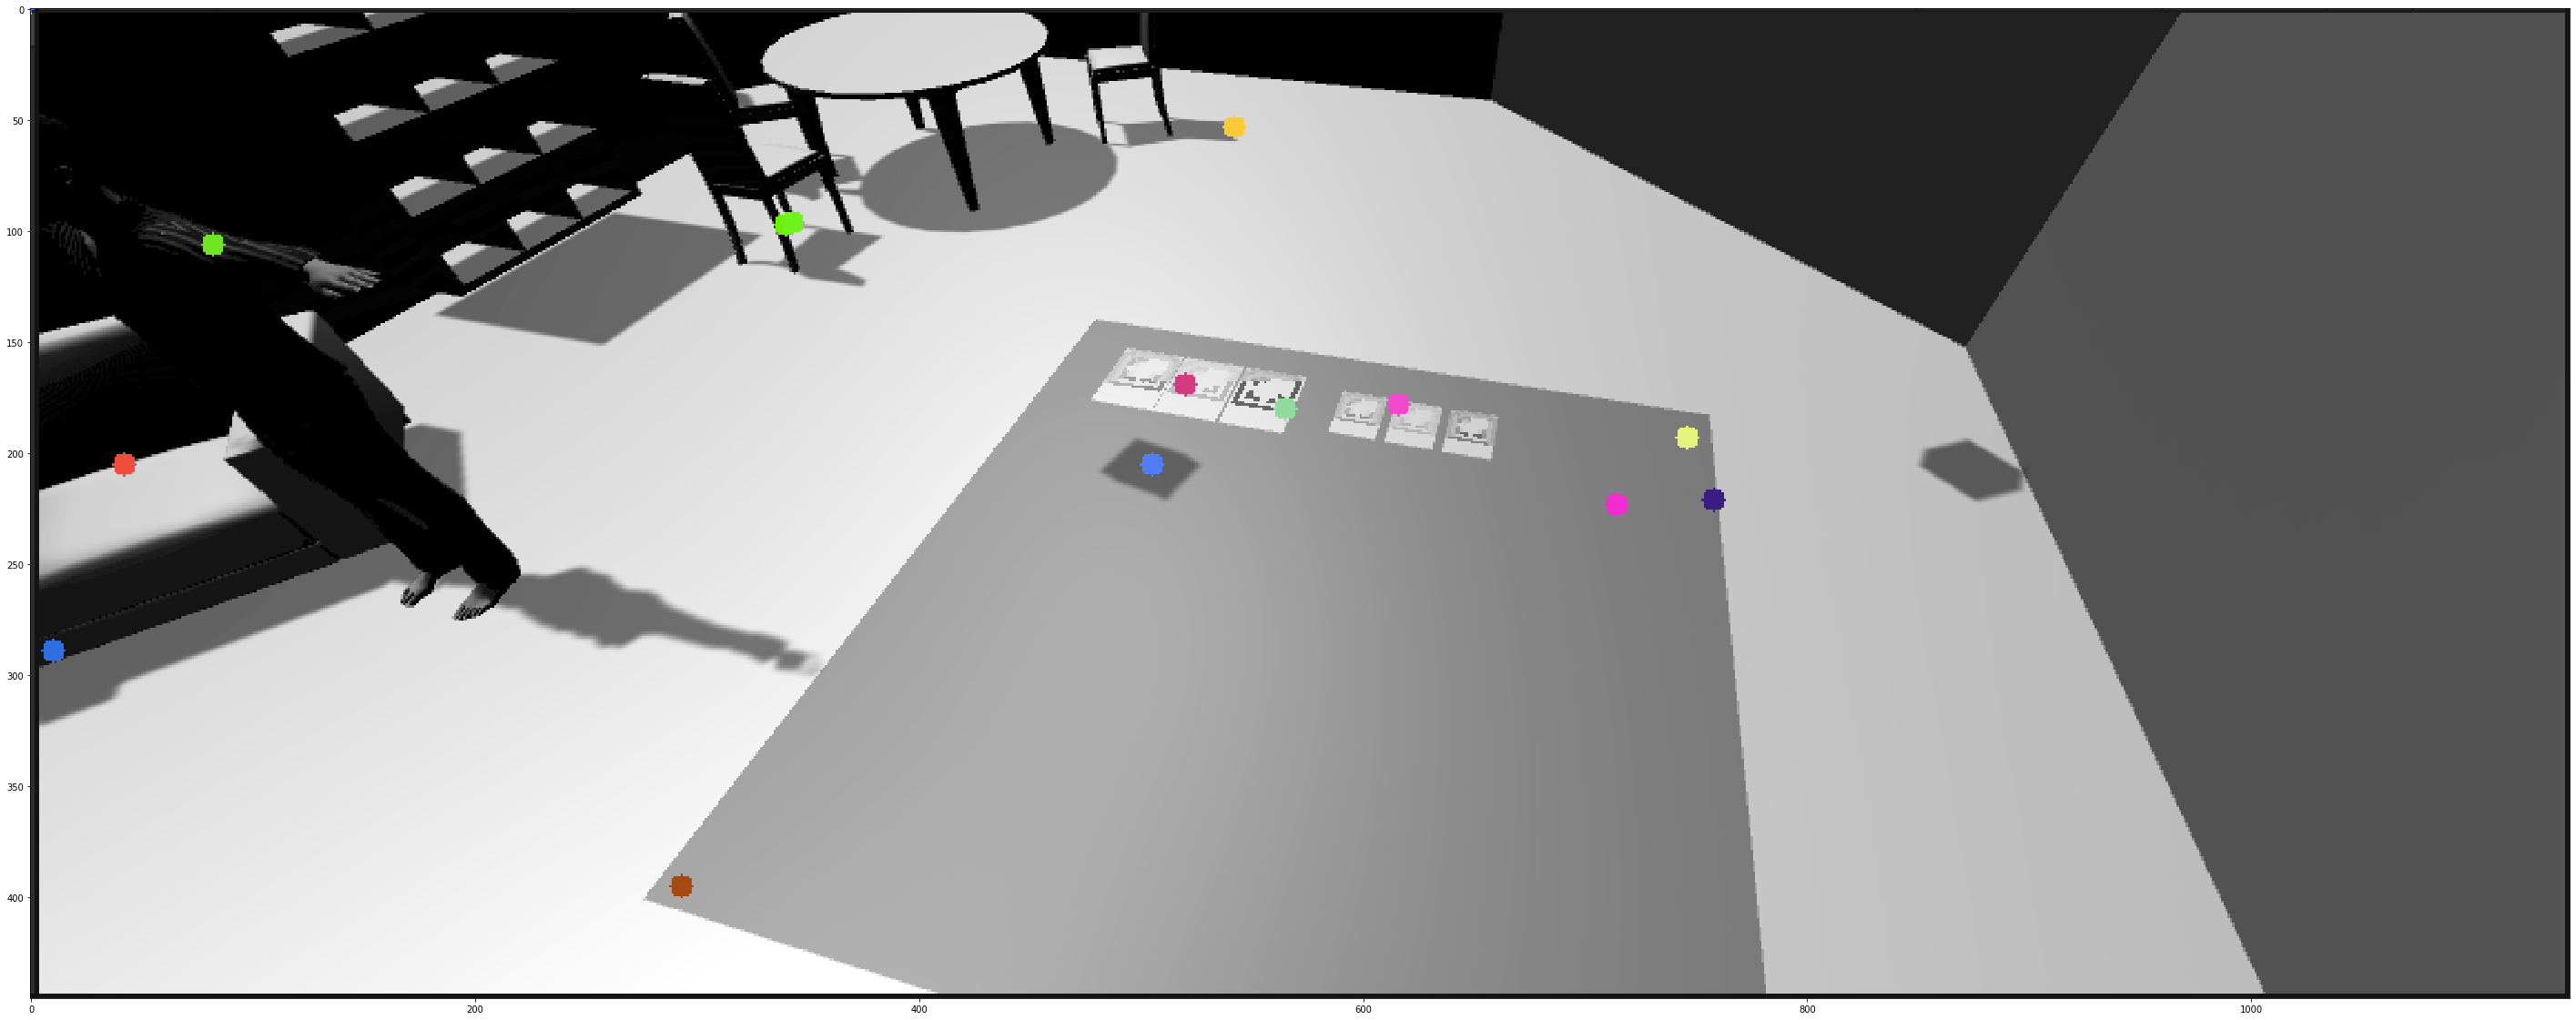

In [46]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,E)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,E)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.figure(figsize=(50,50))
#plt.subplot(121),
plt.imshow(img5)
plt.figure(figsize=(50,50))
#plt.subplot(122),
plt.imshow(img3)
plt.show()

## Depht

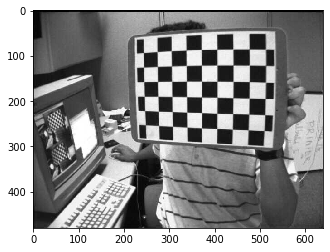

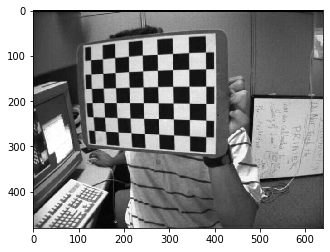

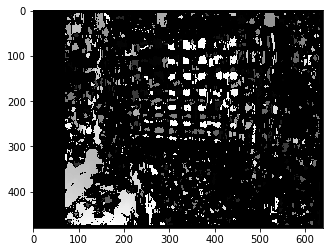

In [22]:
imgL = cv2.imread('aloeL.jpg',0)
imgR = cv2.imread('aloeR.jpg',0)

stereo = cv2.StereoBM_create(numDisparities=64, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(imgL,'gray')
plt.show()
plt.imshow(imgR,'gray')
plt.show()
plt.imshow(disparity,'gray')
plt.show()

## Object Tracking

In [3]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-v", "--video", type=str, help="path to input video file")
ap.add_argument("-t", "--tracker", type=str, default="kcf", help="OpenCV object tracker type")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] [-v VIDEO] [-t TRACKER]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\Alphonse\AppData\Roaming\jupyter\runtime\kernel-1754965c-e796-4e73-a9c0-d1b5e7cb0056.json


SystemExit: 2

C:\Users\Alphonse\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


[INFO] starting video stream...


In [5]:
# extract the OpenCV version info
(major, minor) = cv2.__version__.split(".")[:2]

# if we are using OpenCV 3.2 OR BEFORE, we can use a special factory
# function to create our object tracker
if int(major) == 3 and int(minor) < 3:
    tracker = cv2.Tracker_create(args["tracker"].upper())
# otherwise, for OpenCV 3.3 OR NEWER, we need to explicity call the
# approrpiate object tracker constructor:
else:
    # initialize a dictionary that maps strings to their corresponding
    # OpenCV object tracker implementations
    OPENCV_OBJECT_TRACKERS = {
        "csrt": cv2.TrackerCSRT_create,
        "kcf": cv2.TrackerKCF_create,
        "boosting": cv2.TrackerBoosting_create,
        "mil": cv2.TrackerMIL_create,
        "tld": cv2.TrackerTLD_create,
        "medianflow": cv2.TrackerMedianFlow_create,
        "mosse": cv2.TrackerMOSSE_create
    }
    # grab the appropriate object tracker using our dictionary of
    # OpenCV object tracker objects
    tracker = OPENCV_OBJECT_TRACKERS["mosse"]()
# initialize the bounding box coordinates of the object we are going
# to track
initBB = None

# if a video path was not supplied, grab the reference to the web cam
#if not args.get("video", False):
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
#vs = cv2.VideoCapture(0)
time.sleep(1.0)
# otherwise, grab a reference to the video file
#else:
#    vs = cv2.VideoCapture(args["video"])
# initialize the FPS throughput estimator
fps = None

# loop over frames from the video stream
while True:
    # grab the current frame, then handle if we are using a
    # VideoStream or VideoCapture object
    frame = vs.read()
    #frame = frame[1] if args.get("video", False) else frame
    # check to see if we have reached the end of the stream
    if frame is None:
        break
    # resize the frame (so we can process it faster) and grab the
    # frame dimensions
    frame = imutils.resize(frame, width=500)
    (H, W) = frame.shape[:2]
        # check to see if we are currently tracking an object
    if initBB is not None:
        # grab the new bounding box coordinates of the object
        (success, box) = tracker.update(frame)
        # check to see if the tracking was a success
        if success:
            (x, y, w, h) = [int(v) for v in box]
            cv2.rectangle(frame, (x, y), (x + w, y + h),
                (0, 255, 0), 2)
        # update the FPS counter
        fps.update()
        fps.stop()
        # initialize the set of information we'll be displaying on
        # the frame
        info = [
            ("Tracker", "mosse"),
            ("Success", "Yes" if success else "No"),
            ("FPS", "{:.2f}".format(fps.fps())),
        ]
        # loop over the info tuples and draw them on our frame
        for (i, (k, v)) in enumerate(info):
            text = "{}: {}".format(k, v)
            cv2.putText(frame, text, (10, H - ((i * 20) + 20)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        # show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    # if the 's' key is selected, we are going to "select" a bounding
    # box to track
    if key == ord("s"):
        # select the bounding box of the object we want to track (make
        # sure you press ENTER or SPACE after selecting the ROI)
        initBB = cv2.selectROI("Frame", frame, fromCenter=False,
            showCrosshair=True)
        # start OpenCV object tracker using the supplied bounding box
        # coordinates, then start the FPS throughput estimator as well
        tracker.init(frame, initBB)
        fps = FPS().start()
            # if the `q` key was pressed, break from the loop
    elif key == ord("q"):
                break
# if we are using a webcam, release the pointer
#if not args.get("video", False):
vs.stop()
# otherwise, release the file pointer
#else:
#vs.release()
# close all windows
cv2.destroyAllWindows()

[INFO] starting video stream...


In [23]:
vs.release()

NameError: name 'vs' is not defined

## Calcul de distance entre la Caméra et un objet

In [25]:
def distance_to_camera(real_width,focal_length,width_on_camera):
    return (real_width*focal_length)/width_on_camera

REAL_WIDTH = 5 #20.79 #Taille du rectangle en centimetre
FOCAL_LENGTH = 575 #Pas la vrai

In [5]:
def find_marker(image):
    # convert the image to grayscale, blur it, and detect edges
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 35, 125)
    # find the contours in the edged image and keep the largest one;
    # we'll assume that this is our piece of paper in the image
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    # compute the bounding box of the of the paper region and return it
    return cv2.minAreaRect(c)

In [26]:
# initalize the cam
cap = cv2.VideoCapture(0)
while True:
    _, img = cap.read()
    marker = find_marker(img)
    cm = distance_to_camera(REAL_WIDTH, FOCAL_LENGTH, marker[1][0])
    # draw a bounding box around the image and display it
    box = cv2.cv.BoxPoints(marker) if imutils.is_cv2() else cv2.boxPoints(marker)
    box = np.int0(box)
    cv2.drawContours(img, [box], -1, (0, 255, 0), 2)
    cv2.putText(img, "%.2fcm" % (cm),(img.shape[1] - 300, img.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX,2.0, (0, 255, 0), 3)
    cv2.imshow("image", img)
    if cv2.waitKey(1) == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

## QRcode construction and reading

In [10]:
# Data : ID QRCode, Real Height, Real Width
data = (1,20.79,20.79)
# instantiate a QRCode object
qr = qrcode.QRCode(version=1, box_size=10, border=4)
# add data to the QR code
qr.add_data(data)
# compile the data into a QR code array
qr.make()
# print the image shape
print("The shape of the QR image:", np.array(qr.get_matrix()).shape)
# transfer the array into an actual image
img = qr.make_image(fill_color="black", back_color="white")
# save it to a file
img.save("dimension.png")

The shape of the QR image: (29, 29)


In [17]:
# initalize the cam
cap = cv2.VideoCapture(0)
# initialize the cv2 QRCode detector
detector = cv2.QRCodeDetector()
while True:
    _, img = cap.read()
    # detect and decode
    data, bbox, thing = detector.detectAndDecode(img)
    # check if there is a QRCode in the image
    if bbox is not None:
        # display the image with lines
        for i in range(len(bbox)):
            # draw all lines
            cv2.line(img, tuple(bbox[i][0]), tuple(bbox[(i+1) % len(bbox)][0]), color=(255, 0, 0), thickness=2)
        if data:
            print("[+] QR Code detected, data:", data)
    # display the result
    cv2.imshow("img", img)    
    if cv2.waitKey(1) == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
[[  0.   0.   0.   0.   0.   0.   0. 255. 255. 255. 255.   0.   0. 255.
    0.   0.   0.   0.   0.   0.   0.]
 [  0. 255. 255. 255. 255. 255.   0. 255. 255.   0. 255. 255.   0. 255.
    0. 255. 255. 255. 255. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255. 255. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255. 255. 255. 255. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255. 255. 255. 255. 255.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 255.   0. 255.   0. 255.   0. 255.
    0.   0.   0.   0.   0.   0.   0.]
 [255. 255. 255. 255. 255. 255. 255. 255.   0.   0.   0

[[  0.   0.   0.   0.   0.   0.   0. 255. 255. 255. 255.   0.   0. 255.
    0.   0.   0.   0.   0.   0.   0.]
 [  0. 255. 255. 255. 255. 255.   0. 255. 255.   0. 255. 255.   0. 255.
    0. 255. 255. 255. 255. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255. 255. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255.   0.   0. 255. 255.   0.]
 [  0. 255. 255. 255. 255. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255. 255. 255. 255.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 255.   0. 255.   0. 255.   0. 255.
    0.   0.   0.   0. 255.   0.   0.]
 [255. 255. 255. 255. 255. 255. 255. 255.   0.   0.   0.   0. 255. 255.
  255. 255. 255. 255. 255. 255. 255.]
 [  0. 255.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255.
    0.   0.   0.   0.   0. 255.   0.]
 [255.   0

[[  0.   0.   0.   0.   0.   0.   0. 255. 255. 255. 255.   0.   0. 255.
    0.   0.   0.   0.   0.   0.   0.]
 [  0. 255. 255. 255. 255. 255.   0. 255. 255.   0. 255. 255.   0. 255.
    0. 255. 255. 255. 255. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255. 255. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255. 255. 255. 255. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255. 255. 255. 255. 255.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 255.   0. 255.   0. 255.   0. 255.
    0.   0.   0.   0.   0.   0.   0.]
 [255. 255. 255. 255. 255. 255. 255. 255.   0.   0.   0.   0.   0. 255.
  255. 255. 255. 255. 255. 255. 255.]
 [  0. 255.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255.
    0.   0.   0.   0.   0.   0.   0.]
 [255.   0

None
None
None
None
None
None
[[  0.   0.   0.   0.   0.   0.   0. 255. 255. 255. 255.   0.   0. 255.
    0.   0.   0.   0.   0.   0.   0.]
 [  0. 255. 255. 255. 255. 255.   0. 255. 255.   0. 255. 255.   0. 255.
    0. 255. 255. 255. 255. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255. 255. 255.
    0. 255.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255.   0.   0. 255. 255.   0.]
 [  0. 255. 255. 255. 255. 255.   0. 255.   0.   0.   0. 255.   0. 255.
    0. 255. 255. 255.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 255.   0. 255.   0. 255.   0. 255.
    0.   0. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.   0.   0.   0.   0. 255. 255.
  255. 255.   0.   0. 255. 255. 255.]
 [  0. 255.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255.
    0.   0.   0.  

## Object Detection

[[202, 108, 628, 463], [338, 268, 444, 443]]


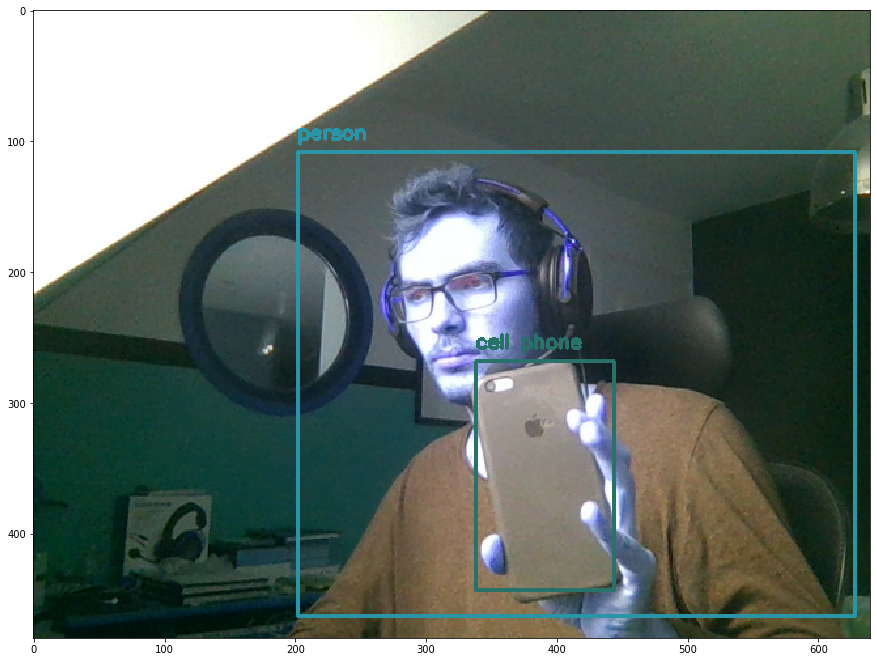

In [18]:
cap = cv2.VideoCapture(0)
_, im = cap.read()
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.figure(figsize=(15,15))
plt.imshow(output_image)
plt.show()
cap.release()

In [ ]:
labels = ["cell phone", "remote"]
yolo = YOLO(weights, config, labels)
bbox, label, conf = yolo.detect_objects(img)
yolo.draw_bbox(img, bbox, label, conf)

In [3]:
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()
    

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    if not status:
        break

    # apply object detection
    bbox, label, conf = cv.detect_common_objects(frame, confidence=0.25, model='yolov3-tiny',enable_gpu=True)
    
    for i in range(len(label)):
        if(label[i] == "cell phone" or label[i] == "remote"):
            bbox = bbox[i]
            break;
            
    if(len(bbox) == 1):            
        # draw bounding box over detected objects
        out = draw_bbox(frame, bbox, label, conf, write_conf=True)

        # display output
        cv2.imshow("Real-time object detection", out)
    else:
        cv2.imshow("Real-time object detection", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# release resources
webcam.release()
cv2.destroyAllWindows()

### OpenCV Feature Matching + Homography to find objects

In [1]:
MIN_MATCH_COUNT = 10

img1 = cv2.imread('test_feuille_scene_unity_E_no_chara.png')          # queryImage
img2 = cv2.imread('test_feuille_scene_unity_Z_no_chara.png') # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.figure(figsize=(70,70))
plt.imshow(img3, 'gray'),plt.show()

NameError: name 'cv2' is not defined

## Object Detection & Tracking

[INFO] starting video stream...


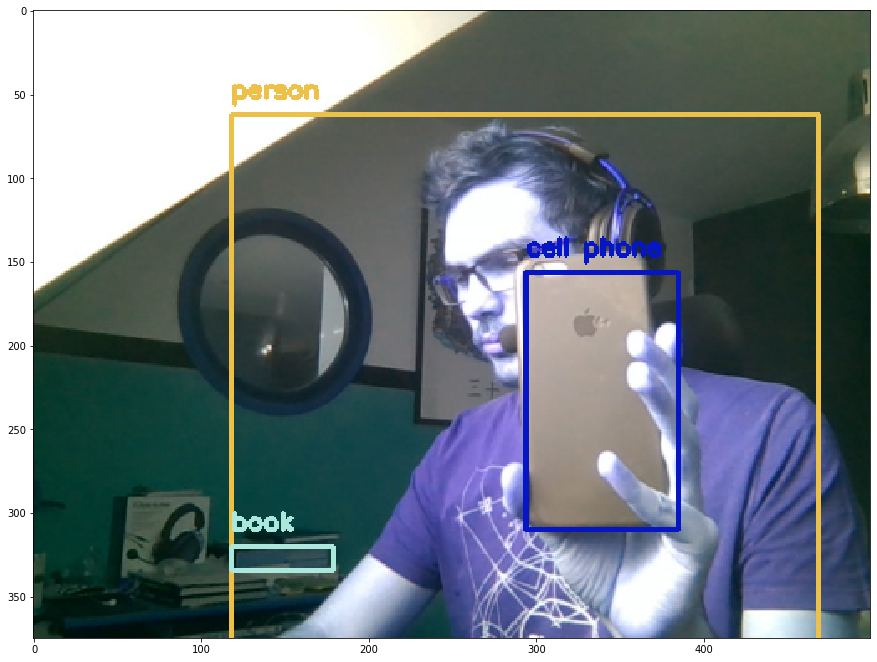

In [4]:
# extract the OpenCV version info
(major, minor) = cv2.__version__.split(".")[:2]

# if we are using OpenCV 3.2 OR BEFORE, we can use a special factory
# function to create our object tracker
if int(major) == 3 and int(minor) < 3:
    tracker = cv2.Tracker_create(args["tracker"].upper())
# otherwise, for OpenCV 3.3 OR NEWER, we need to explicity call the
# approrpiate object tracker constructor:
else:
    # initialize a dictionary that maps strings to their corresponding
    # OpenCV object tracker implementations
    OPENCV_OBJECT_TRACKERS = {
        "csrt": cv2.TrackerCSRT_create,
        "kcf": cv2.TrackerKCF_create,
        "boosting": cv2.TrackerBoosting_create,
        "mil": cv2.TrackerMIL_create,
        "tld": cv2.TrackerTLD_create,
        "medianflow": cv2.TrackerMedianFlow_create,
        "mosse": cv2.TrackerMOSSE_create
    }
    # grab the appropriate object tracker using our dictionary of
    # OpenCV object tracker objects
    tracker = OPENCV_OBJECT_TRACKERS["kcf"]()
# initialize the bounding box coordinates of the object we are going
# to track
initBB = None

# if a video path was not supplied, grab the reference to the web cam
#if not args.get("video", False):
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
#vs = cv2.VideoCapture(0)
time.sleep(1.0)
# otherwise, grab a reference to the video file
#else:
#    vs = cv2.VideoCapture(args["video"])
# initialize the FPS throughput estimator
fps = None

# loop over frames from the video stream
while True:
    # grab the current frame, then handle if we are using a
    # VideoStream or VideoCapture object
    frame = vs.read()
    #frame = frame[1] if args.get("video", False) else frame
    # check to see if we have reached the end of the stream
    if frame is None:
        break
    # resize the frame (so we can process it faster) and grab the
    # frame dimensions
    frame = imutils.resize(frame, width=500)
    (H, W) = frame.shape[:2]
        # check to see if we are currently tracking an object
    if initBB is not None:
        # grab the new bounding box coordinates of the object
        (success, box) = tracker.update(frame)
        # check to see if the tracking was a success
        if success:
            (x, y, w, h) = [int(v) for v in box]
            cv2.rectangle(frame, (x, y), (x + w, y + h),
                (0, 255, 0), 2)
        # update the FPS counter
        fps.update()
        fps.stop()
        # initialize the set of information we'll be displaying on
        # the frame
        info = [
            ("Tracker", "kcf"),
            ("Success", "Yes" if success else "No"),
            ("FPS", "{:.2f}".format(fps.fps())),
        ]
        # loop over the info tuples and draw them on our frame
        for (i, (k, v)) in enumerate(info):
            text = "{}: {}".format(k, v)
            cv2.putText(frame, text, (10, H - ((i * 20) + 20)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        # show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    # if the 's' key is selected, we are going to "select" a bounding
    # box to track
    if key == ord("s"):
        # select the bounding box of the object we want to track (make
        # sure you press ENTER or SPACE after selecting the ROI)
        
        bbox, label, conf = cv.detect_common_objects(frame)
        for i in range(len(label)):
            if(label[i] == "cell phone" or label[i] == "remote"):
                    initBB = tuple(bbox[i])
                    break;
                    
        if initBB == None:
            initBB = cv2.selectROI("Frame", frame, fromCenter=False,showCrosshair=True)
        
        output_image = draw_bbox(frame, bbox, label, conf)
        plt.figure(figsize=(15,15))
        plt.imshow(output_image)
        plt.show()
        # start OpenCV object tracker using the supplied bounding box
        # coordinates, then start the FPS throughput estimator as well
        tracker.init(frame, initBB)
        fps = FPS().start()
            # if the `q` key was pressed, break from the loop
    elif key == ord("q"):
                break
# if we are using a webcam, release the pointer
#if not args.get("video", False):
vs.stop()
# otherwise, release the file pointer
#else:
#vs.release()
# close all windows
cv2.destroyAllWindows()

## Distance to object and vectorization

In [20]:
def degree_to_radian(angle):
    return angle * math.pi / 180

In [21]:
degree_to_radian(90)

1.5707963267948966

In [29]:
def distance_to_camera_center(height_of_camera,angle_of_camera):
    return height_of_camera/math.cos(degree_to_radian(angle_of_camera))

In [30]:
distance_to_camera_center(2.5,50.19)

3.9047626484176776

In [25]:
def distance_to_object(distance_to_camera_center,distance_centerQR_camera_centre,angle):
    return math.sqrt(distance_to_camera_center**2 + distance_centerQR_camera_centre**2 - (2*(distance_to_camera_center*distance_centerQR_camera_centre*math.cos(degree_to_radian(angle)))))

In [26]:
distance_to_object(3.91,1,90)

4.035851830778727